import the necessary packages

In [1]:
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
net = cv2.dnn.readNetFromCaffe(r'/content/drive/MyDrive/Colab Notebooks/PyImageSearch/opencv-master/samples/dnn/face_detector/deploy.prototxt', r'/content/drive/MyDrive/Colab Notebooks/PyImageSearch/res10_300x300_ssd_iter_140000.caffemodel')

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/PyImageSearch/2.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [6]:
net.setInput(blob)
detections = net.forward()

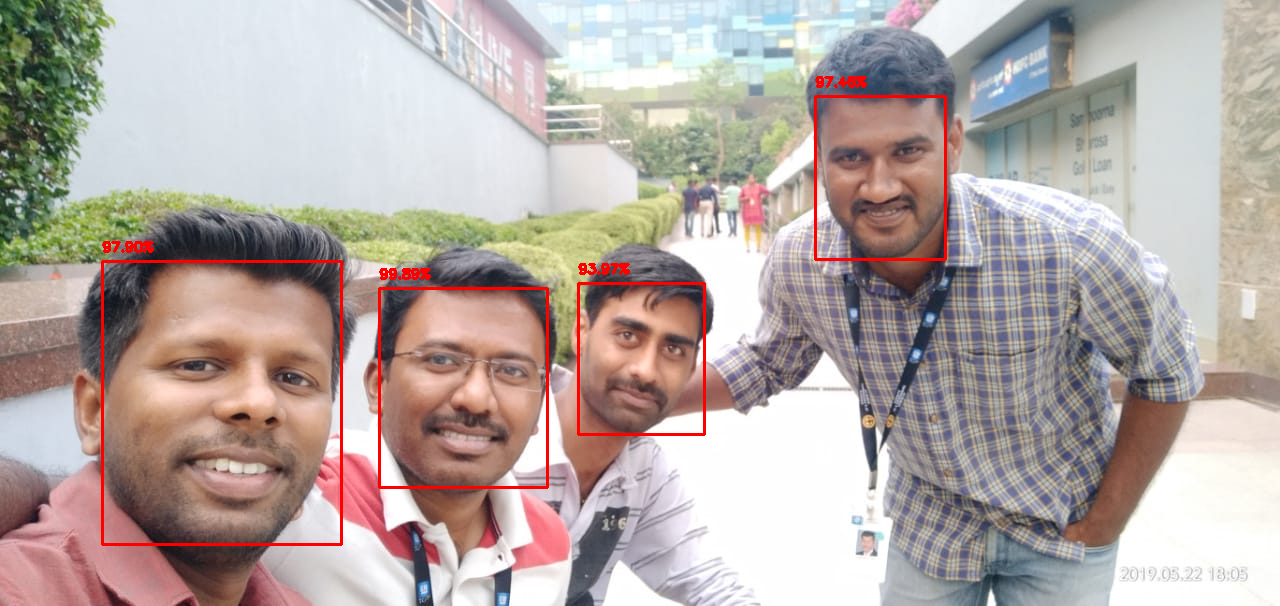

-1

In [7]:
from google.colab.patches import cv2_imshow

for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # confidence = 0.8
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.7:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

In [8]:
# import the necessary packages
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2

In [9]:
# load our serialized model from disk
net = cv2.dnn.readNetFromCaffe(r'/content/drive/MyDrive/Colab Notebooks/PyImageSearch/opencv-master/samples/dnn/face_detector/deploy.prototxt', r'/content/drive/MyDrive/Colab Notebooks/PyImageSearch/res10_300x300_ssd_iter_140000.caffemodel')

# initialize the video stream and allow the camera sensor to warm up
vs = VideoStream(src=0).start()
time.sleep(2.0)

In [10]:
# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
 
	# grab the frame dimensions and convert it to a blob
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
		(300, 300), (104.0, 177.0, 123.0))
 
	# pass the blob through the network and obtain the detections and
	# predictions
	net.setInput(blob)
	detections = net.forward()

AttributeError: ignored

In [11]:
# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with the
		# prediction
		confidence = detections[0, 0, i, 2]
		# filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
		if confidence < 0.5:
			continue
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(frame, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(frame, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

IndentationError: ignored

In [12]:
	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
 
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

DisabledFunctionError: ignored